# PART 1 - Healthcare
## 1. Importing all libraries

## For numerical calculations and performing operations in csv or excel files

## For data visuvalization

## Data preprocessing - converting classes to some distinct number, normalizing the columns if the units is not mentioned

## Splitting the data

## KNN algorithm import

## Metrics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

## Importing all data frames and vieweing the dataframes to see their columns

In [4]:
df = pd.read_csv("C:\\Users\\kragha\\Desktop\\Files\\AIML\\AIML_Project2\\part1\\Part1 - Normal.csv")
df1 = pd.read_csv("C:\\Users\\kragha\\Desktop\\Files\\AIML\\AIML_Project2\\part1\\Part1 - Type_H.csv")
df2 = pd.read_csv("C:\\Users\\kragha\\Desktop\\Files\\AIML\\AIML_Project2\\part1\\Part1 - Type_S.csv")

In [5]:
df.head(2)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal


In [6]:
df1.head(2)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H


In [7]:
df2.head(2)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S


## Shape and size of all 3 Dataframes

In [8]:
data = [df,df1,df2]

for n in data:
    print(n.shape)

(100, 7)
(60, 7)
(150, 7)


## Merge all datasets to one as dff and finding dff's shape

In [9]:
dff = pd.concat([df,df1,df2],axis=0)

In [10]:
dff.shape

(310, 7)

## 2. Data cleansing: checking the data types of all columns and then checking for nulls

In [11]:
dff.dtypes
# Class is of datatype object, it can be changed when we visuvalize data and create train test split

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [13]:
dff.isnull().sum()
#no null values which means it does not require any corrections

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [14]:
dff['Class'].unique()

array(['Normal', 'Nrmal', 'Type_H', 'type_h', 'Type_S', 'tp_s'],
      dtype=object)

## We notice the classes having incorrect spellings and some being in capitals - we take this decision only after a confirmation from the domain expertise, in this case it looks clear 

In [16]:
def class_correction(x):
    if x == 'Nrmal':
        return 'Normal'
    elif x == 'type_h':
        return 'Type_H'
    elif x == 'tp_s':
        return 'Type_S'
    else:
        return x

In [17]:
dff['Class'] = dff['Class'].apply(class_correction)

In [19]:
dff['Class'].unique()
# Class issues solved

array(['Normal', 'Type_H', 'Type_S'], dtype=object)

In [20]:
dff.isnull().values.any()
#No nan values, shorter way of checking

False

## 3. Statistical Analysis

In [21]:
dff.describe()
#This gives a 5 point summary like box plot where we get an idea about skewness

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [100]:
dff

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0
...,...,...,...,...,...,...,...
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,2
146,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,2
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,2
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,2


<Figure size 1296x864 with 0 Axes>

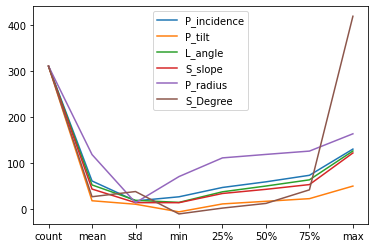

<Figure size 1296x864 with 0 Axes>

In [22]:
dff.describe().plot()
plt.figure(figsize = (18,12))
#The 5 point summary displayed as a plot

In [23]:
dff.groupby('Class').count()
# We get to see how the classes are distributed in all columns

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
Class,,,,,,
Normal,100,100,100,100,100,100
Type_H,60,60,60,60,60,60
Type_S,150,150,150,150,150,150


C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

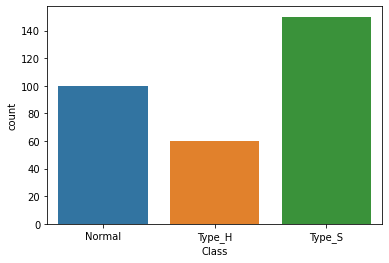

In [24]:
sns.countplot(dff['Class'])
# checking the count of classes

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='P_incidence', ylabel='Density'>

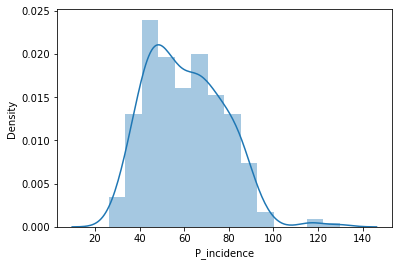

In [25]:
sns.distplot(dff['P_incidence'])
#we see right skewness, otherwise it is normally distributed

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='P_tilt', ylabel='Density'>

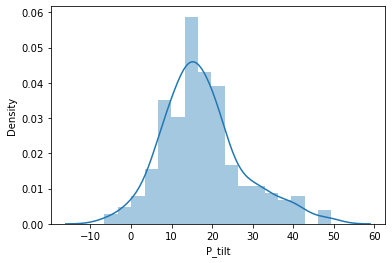

In [26]:
sns.distplot(dff['P_tilt'])
#normally distributed, right skewed

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='L_angle', ylabel='Density'>

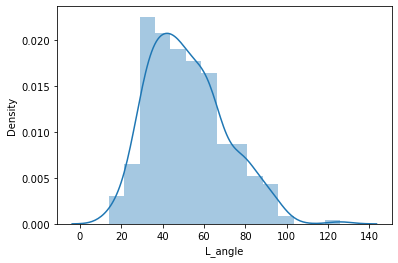

In [27]:
sns.distplot(dff['L_angle'])
#skewed on right

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='S_slope', ylabel='Density'>

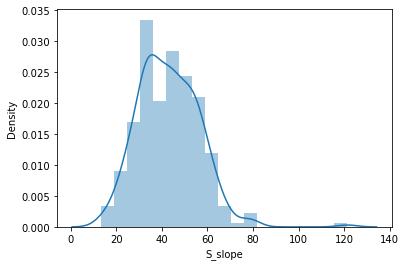

In [28]:
sns.distplot(dff['S_slope'])
#right skewed, this one has more skewness than others comparitively

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='P_radius', ylabel='Density'>

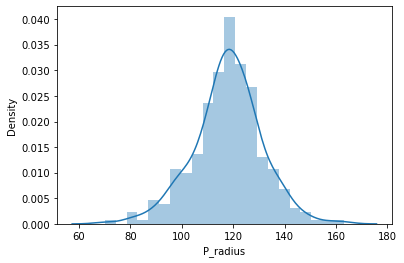

In [29]:
sns.distplot(dff['P_radius'])
# we see skewness on left side

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='S_Degree', ylabel='Density'>

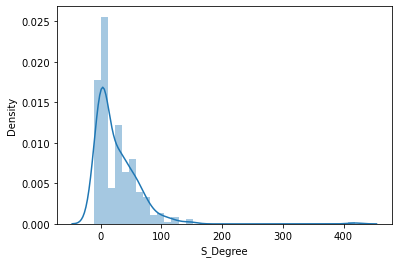

In [30]:
sns.distplot(dff['S_Degree'])
#highly skewed on right

## We can also check the box plot of all columns where will get to see its outliers

In [31]:
dff.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='P_tilt'>

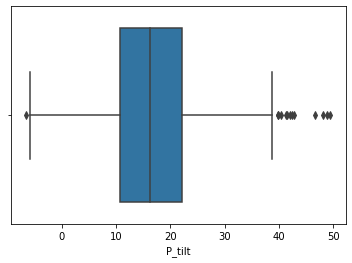

In [32]:
sns.boxplot('P_tilt',data=dff)
#most of the outliers on the right side

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='P_incidence'>

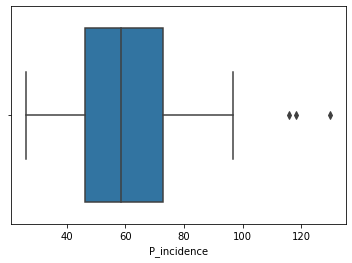

In [33]:
sns.boxplot('P_incidence',data=dff)
#comparitively less outliers

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='L_angle'>

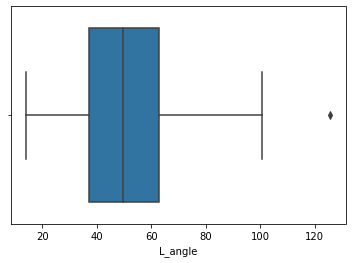

In [35]:
sns.boxplot('L_angle',data=dff)
#the least number outlier in column but still a  huge value

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='S_slope'>

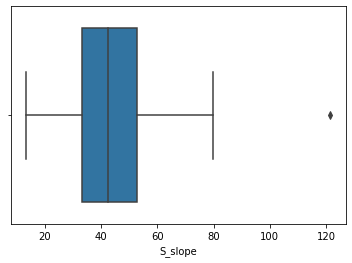

In [36]:
sns.boxplot('S_slope',data=dff)
#the least number outlier in column but yet huge value

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='P_radius'>

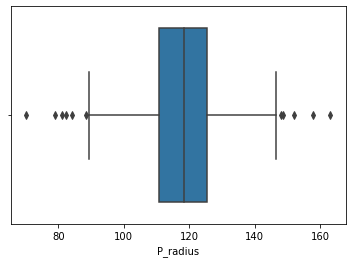

In [37]:
sns.boxplot('P_radius',data=dff)
#contains outliers on both the sides

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='S_Degree'>

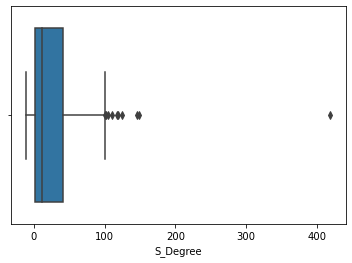

In [38]:
sns.boxplot('S_Degree',data=dff)
#outliers on right side

## Comparing Each columns with target

<AxesSubplot:xlabel='Class', ylabel='S_Degree'>

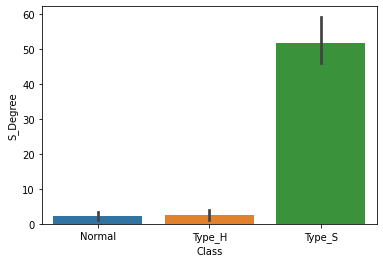

In [39]:
sns.barplot(x='Class', y='S_Degree', data=dff)
#A lot of values in Columns S_degree contribute  to class Type_S class (Explained in detail using scatter)

<AxesSubplot:xlabel='Class', ylabel='P_radius'>

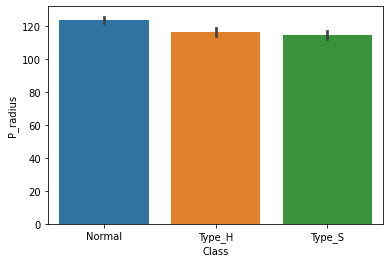

In [40]:
sns.barplot(x='Class', y='P_radius', data=dff)
# Almost Even contribution to all classes (Explained in detail using scatter)

<AxesSubplot:xlabel='Class', ylabel='S_slope'>

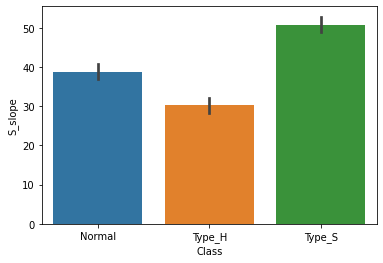

In [41]:
sns.barplot(x='Class', y='S_slope', data=dff)
#A lot of values in Columns S_degree contribute  to class Type_S class and lesser of S_slope for type_H(Explained in detail using scatter)

<AxesSubplot:xlabel='Class', ylabel='L_angle'>

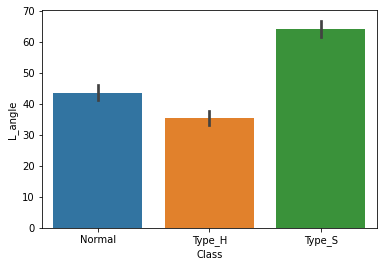

In [42]:
sns.barplot(x='Class', y='L_angle', data=dff)
#Same as above (Explained in detail using scatter)

<AxesSubplot:xlabel='Class', ylabel='P_tilt'>

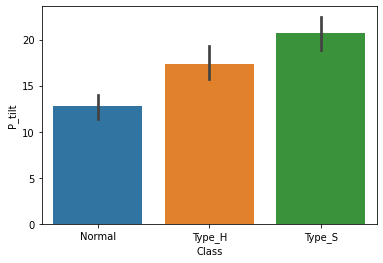

In [43]:
sns.barplot(x='Class', y='P_tilt', data=dff)
#P_tilt contibutes to Type_S as well (Explained in detail using scatter)

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


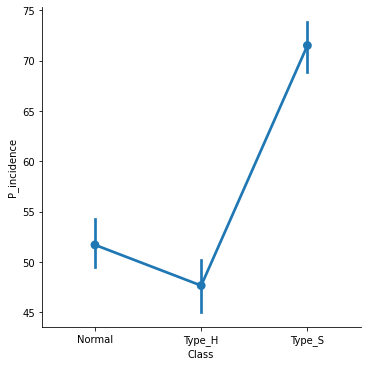

In [44]:
sns.factorplot(x='Class', y='P_incidence', data=dff)
#For a change used factor plot to compare categorical variable with continuous data, even here more of P_incidence supports class Type_S

In [45]:
dff.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1440x1296 with 0 Axes>

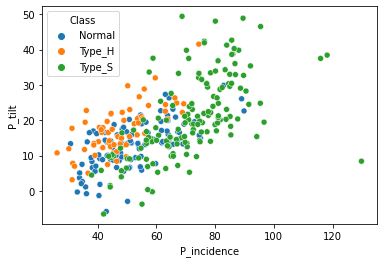

<Figure size 1440x1296 with 0 Axes>

In [47]:
sns.scatterplot('P_incidence','P_tilt',hue ='Class', data=dff)
plt.figure(figsize=(20,18))
#It is more evident that with increase in P_incidence and P_tilt, it contributes to class Type_S & viceversa for normal

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1440x1296 with 0 Axes>

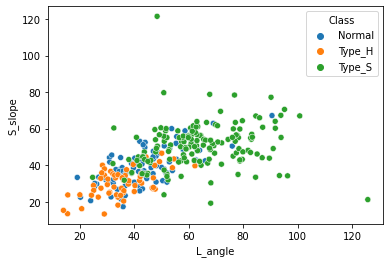

<Figure size 1440x1296 with 0 Axes>

In [52]:
sns.scatterplot('L_angle','S_slope',hue ='Class', data=dff)
plt.figure(figsize=(20,18))
# Here more of L_angle and S_slope relates to Type_S and viceversa contributes to Type_H

C:\Users\kragha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1440x1296 with 0 Axes>

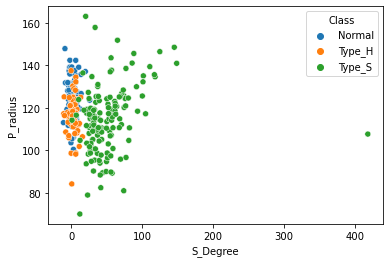

<Figure size 1440x1296 with 0 Axes>

In [53]:
sns.scatterplot('S_Degree','P_radius',hue ='Class', data=dff)
plt.figure(figsize=(20,18))
# plt.figure(figsize=(20,10))
# S_Degree is a comparitively a very good seperator of class for Type_S

In [54]:
le = LabelEncoder()
# Now label encoding the classes which will be used for model building and prediction

In [55]:
dff['Class'] = le.fit_transform(dff['Class'])

## 4.Data pre-processing:

In [56]:
dff.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0


## Segregate predictors vs target attributes

In [57]:
X = dff.drop('Class',axis=1)#feature columns
y = dff['Class']#Prediction column

In [58]:
#since we are not sure about the units of each column in the data and also there is no explanation given, 
#its always safe to normalize the data using Zscore or standar scaler
y.value_counts()

2    150
0    100
1     60
Name: Class, dtype: int64

## Perform normalisation or scaling if required - Standarad Scaler

In [59]:
ss = StandardScaler()
normalized = ss.fit_transform(X)
ddd = pd.DataFrame(normalized,columns = dff.columns[:-1])
ddd.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,-1.277922,-0.057898,-0.907904,-1.597803,0.730468,-0.488288
1,-0.324010,0.142672,-0.017786,-0.522437,0.596124,-0.647896
2,-0.937559,-0.860412,-0.271475,-0.562386,0.849889,-0.568091
3,-0.707649,-0.009077,-0.212206,-0.901920,0.831811,-0.725568
4,-0.859732,-0.688835,-0.504914,-0.590377,0.921914,-0.791650


## Zscore

In [60]:
zz = stats.zscore(X)
dde = pd.DataFrame(zz,columns = dff.columns[:-1])
dde.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,-1.277922,-0.057898,-0.907904,-1.597803,0.730468,-0.488288
1,-0.324010,0.142672,-0.017786,-0.522437,0.596124,-0.647896
2,-0.937559,-0.860412,-0.271475,-0.562386,0.849889,-0.568091
3,-0.707649,-0.009077,-0.212206,-0.901920,0.831811,-0.725568
4,-0.859732,-0.688835,-0.504914,-0.590377,0.921914,-0.791650


In [61]:
#We see that both Z score and standarad scaler are the same, we can take any preprocessing output.

## Check for target balancing. Add your comments.

In [62]:
y.value_counts()

2    150
0    100
1     60
Name: Class, dtype: int64

In [63]:
# Yes, the classes are imbalanced with class 1 being 40 countsless than class 0 and 90 counts less than class 2, 
#similarly for others but while splitting this gaps might get reduced, lets check post train test split

## Perform train-test split.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=110)

In [65]:
y_train.value_counts()

2    107
0     68
1     42
Name: Class, dtype: int64

In [66]:
#Once the train test split is done we see the difference between class 1 and 2 has been reduced to 61 in train whereas
#in total data it was around 90, we can move with this as of now but we will take care of precision, recall and F1 
# score metric to evaluvate our model

## Model training, testing and tuning:

In [67]:
#Design and train a KNN classifier

In [68]:
knn = KNeighborsClassifier(n_neighbors=5)
#randomly setting n_neighbours to 5 -----> This is the best model, explained in the end
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [69]:
newdf = pd.DataFrame(pred,columns=['Predicted'])
newdf['Actual'] = y_test.values

## Display the classification accuracies for train and test data.

In [70]:
knn.score(X_train,y_train)

0.8571428571428571

In [71]:
knn.score(X_test,y_test)

0.8817204301075269

In [72]:
#Looks like the KNN non parametric model is performing little better in test data

## Display and explain the classification report in detai

In [74]:
print(classification_report(y_test,pred))
# Recall being the true positive rate, comes at 84% on detecting class 0 , 76% on detecting class 1 and 98% on detecting class 2
# Precision being the metric to show how many were calculate as positive at which how many were actually positive shows 82% for class0,76% for class1 and 98% for class 2
# F1 score being the trade off of both precision and recall is at 83% for class 0, 74% at class1 and 98% for class 2

#In general we are unsure as to which class contributes to a bad or worse class, we might have to get confirmation from
#Domain expertise and then decide on precision or Recall as right metric, in general F1 score will be better for all scenarios
#Overall this looks like a better KNN prediction with n neighbours=5

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.76      0.72      0.74        18
           2       0.98      0.98      0.98        43

    accuracy                           0.88        93
   macro avg       0.85      0.85      0.85        93
weighted avg       0.88      0.88      0.88        93



In [75]:
print(confusion_matrix(y_test,pred))
# confusion matrix shows 82 of them being correctly classified and only 11 of them being incorrectly classified out of total 93 test data

[[27  4  1]
 [ 5 13  0]
 [ 1  0 42]]


## Automate the task of finding best values of K for KNN

In [217]:
#Even though the above model displays a better metric, its always good to try out with multiple K values

In [77]:
error = []

for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != y_test))
    print(k)
    print(confusion_matrix(y_test,pred))
    print()

1
[[29  2  1]
 [ 8 10  0]
 [ 1  0 42]]

2
[[32  0  0]
 [13  5  0]
 [ 1  0 42]]

3
[[26  6  0]
 [ 8 10  0]
 [ 1  0 42]]

4
[[30  2  0]
 [10  8  0]
 [ 1  0 42]]

5
[[27  4  1]
 [ 5 13  0]
 [ 1  0 42]]

6
[[30  2  0]
 [ 9  9  0]
 [ 1  0 42]]

7
[[29  2  1]
 [ 7 11  0]
 [ 1  0 42]]

8
[[30  1  1]
 [10  8  0]
 [ 1  0 42]]

9
[[30  1  1]
 [10  8  0]
 [ 1  0 42]]

10
[[31  1  0]
 [11  7  0]
 [ 1  0 42]]

11
[[29  2  1]
 [ 8 10  0]
 [ 1  0 42]]

12
[[31  1  0]
 [ 9  9  0]
 [ 1  0 42]]

13
[[29  2  1]
 [ 8 10  0]
 [ 1  0 42]]

14
[[29  2  1]
 [12  6  0]
 [ 1  0 42]]

15
[[28  3  1]
 [10  8  0]
 [ 1  0 42]]

16
[[28  3  1]
 [11  7  0]
 [ 1  0 42]]

17
[[28  3  1]
 [ 9  9  0]
 [ 1  0 42]]

18
[[29  2  1]
 [11  7  0]
 [ 1  0 42]]

19
[[28  3  1]
 [ 9  9  0]
 [ 1  0 42]]

20
[[29  2  1]
 [10  8  0]
 [ 1  0 42]]

21
[[29  2  1]
 [ 9  9  0]
 [ 1  0 42]]

22
[[29  2  1]
 [ 9  9  0]
 [ 1  0 42]]

23
[[28  3  1]
 [ 9  9  0]
 [ 1  0 42]]

24
[[29  2  1]
 [10  8  0]
 [ 1  0 42]]

25
[[28  3  1]
 [ 8 10  0

Text(0, 0.5, 'Error')

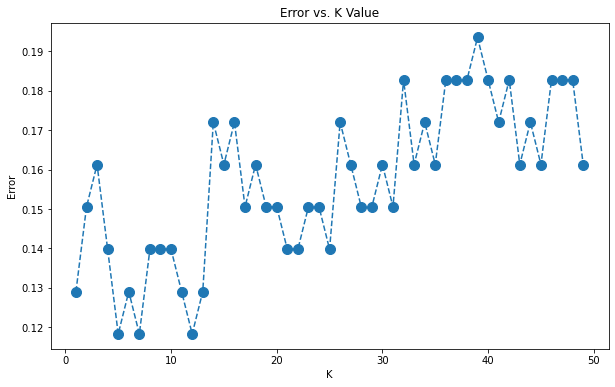

In [78]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error,linestyle='dashed', marker='o', markersize=10)
plt.title('Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Error')

In [244]:
dff.count()

P_incidence    310
P_tilt         310
L_angle        310
S_slope        310
P_radius       310
S_Degree       310
Class          310
dtype: int64

## k = 5 or k = 7 can be taken but with k = 7 we see that the False Negative increases to 8 whereas in k=5 the FN comes down to 6 so we choose k = 5

## Apply  all  the  possible  tuning  techniques  to  train  the  best  model  for  the  given  data.  Select  the final  best  trained model with your comments for selecting this model. 

In [307]:
distance = ['manhattan','minkowski','cosine']
error = []
for d in distance:
    knn = KNeighborsClassifier(n_neighbors=5,metric = d)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != y_test))
    print(d)
    print(confusion_matrix(y_test,pred))
    print()
    print(classification_report(y_test,pred))
    print()
    

manhattan
[[27  4  1]
 [ 6 12  0]
 [ 2  0 41]]

              precision    recall  f1-score   support

           0       0.77      0.84      0.81        32
           1       0.75      0.67      0.71        18
           2       0.98      0.95      0.96        43

    accuracy                           0.86        93
   macro avg       0.83      0.82      0.83        93
weighted avg       0.86      0.86      0.86        93


minkowski
[[27  4  1]
 [ 5 13  0]
 [ 1  0 42]]

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.76      0.72      0.74        18
           2       0.98      0.98      0.98        43

    accuracy                           0.88        93
   macro avg       0.85      0.85      0.85        93
weighted avg       0.88      0.88      0.88        93


cosine
[[25  7  0]
 [11  7  0]
 [ 1  0 42]]

              precision    recall  f1-score   support

           0       0.68      0.78      0

# Conclusion and improvisation:

# The default Minkowski distance does well and the k value = 5 does give the lowest False negative as well. So,  we leave the distance as default and take the initial KNN as the best trained model